In [39]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from imutils import contours
import imutils
from PIL import Image

In [68]:
image = cv.imread('./image/scan_image.jpg')
#image = imutils.resize(image, width=1000)
image_copy = image.copy()
# image_re = np.zeros(image_copy.shape, np.uint8)
image_re = np.full(image_copy.shape, 255, np.uint8)
# image2 = cv2.resize(image, (300, 192))
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

cv.imshow('imgae_re', cv.resize(image_re, None, fx=0.3, fy=0.3))
#cv.imshow('imgae_re', image_re)

cv.waitKey(0)
cv.destroyAllWindows()

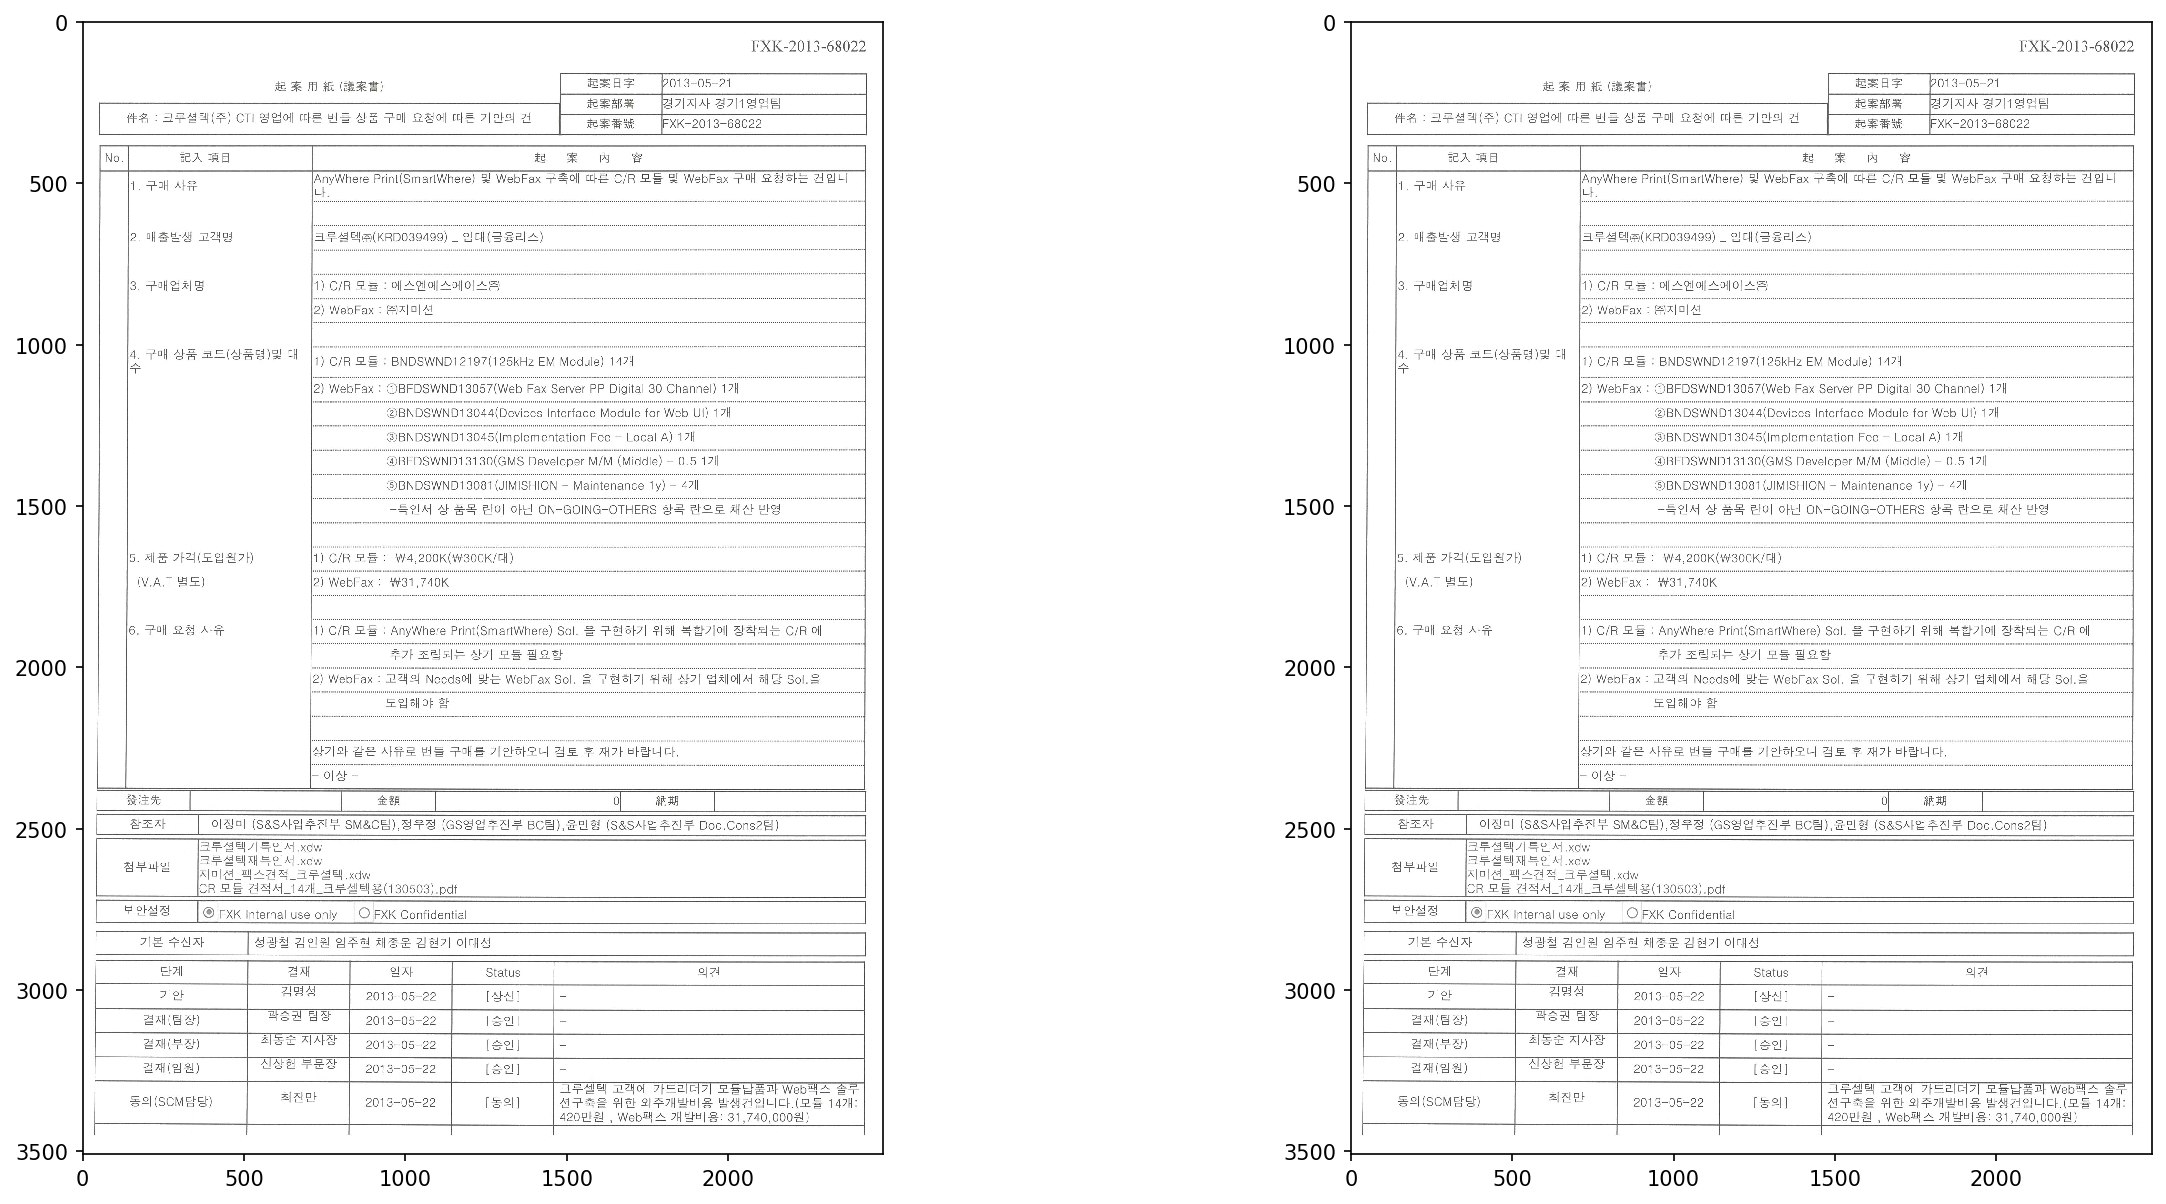

In [69]:
# Plot
plt.figure(figsize=(20, 10), dpi=150)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 2, 2)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

plt.show()

In [78]:
rectKernel = cv.getStructuringElement(cv.MORPH_RECT, (20, 3))  # 직사각형 커널
sqKernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))   # 정사각형 커널

In [79]:
tophat = cv.morphologyEx(gray, cv.MORPH_TOPHAT, rectKernel)

In [80]:
# compute the Scharr gradient of the tophat image, then scale
# the rest back into the range [0, 255]
# 소벨을 통해 엣지 검출 (하기 이미지 참조)
gradX = cv.Sobel(tophat, ddepth=cv.CV_32F, dx=1, dy=0, ksize=-1)
gradX = np.absolute(gradX)
gradY = cv.Sobel(tophat, ddepth=cv.CV_32F, dx=0, dy=1, ksize=-1)
gradY = np.absolute(gradY)

(minVal, maxVal) = (np.min(gradX), np.max(gradX))
gradX = (255 * ((gradX - minVal) / (maxVal - minVal)))
gradX = gradX.astype('uint8')
cv2.imshow('gradX_x', gradX)

(minVal, maxVal) = (np.min(gradY), np.max(gradY))
gradY = (255 * ((gradY - minVal) / (maxVal - minVal)))
gradY = gradY.astype('uint8')
cv2.imshow('gradY_y', gradY)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [81]:
# apply a closing operation using the rectangular kernel to help
# close gaps in between credit card number digits, then apply
# Otsu's thresholding method to binarize the image
gradX_ = cv.morphologyEx(gradX, cv.MORPH_CLOSE, rectKernel)
thresh = cv.threshold(gradX_, 0 , 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1]

# apply a second closing operation to the binary image, again
# to help close gaps between credit card number regions
thresh1 = cv.morphologyEx(thresh, cv.MORPH_CLOSE, sqKernel)

cv.imshow('gradX', gradX)
cv.imshow('thresh1', thresh1)

cv.waitKey(0)
cv.destroyAllWindows()
'''
# Plot
plt.figure(figsize=(20, 10), dpi=150) 
plt.subplot(1, 3, 1)
plt.imshow(gradX, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)

plt.subplot(1, 3, 3)
plt.imshow(thresh1, cmap='gray', vmin=0, vmax=255)

plt.show()
'''


"\n# Plot\nplt.figure(figsize=(20, 10), dpi=150) \nplt.subplot(1, 3, 1)\nplt.imshow(gradX, cmap='gray', vmin=0, vmax=255)\n\nplt.subplot(1, 3, 2)\nplt.imshow(thresh, cmap='gray', vmin=0, vmax=255)\n\nplt.subplot(1, 3, 3)\nplt.imshow(thresh1, cmap='gray', vmin=0, vmax=255)\n\nplt.show()\n"

In [82]:
# find contours in the thresholded image, then initialize the list of diti locations
cnts = cv.findContours(thresh1.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
locs = []

In [83]:
for (i, c) in enumerate(cnts):
    # compute the bounding box of the contour, then use the bounding box coordinates to derive the aspect ratio
    (x, y, w, h) = cv.boundingRect(c)
    
    if h > 10.0:
        locs.append((x, y ,w, h))
        #img_rec = cv.rectangle(image_copy, (x-5, y-5), (x+w+5, y+h+5), (0, 255, 0), 2)
        img_rec = cv.rectangle(image_copy, (x-2, y-2), (x+w+2, y+h+2), (0, 255, 0), 2)
        print(locs)
# plt.imshow(img_rec, cmap='gray', vmin=0, vmax=255)

[(509, 3420, 3, 32)]
[(509, 3420, 3, 32), (2002, 3379, 249, 35)]
[(509, 3420, 3, 32), (2002, 3379, 249, 35), (1826, 3379, 157, 33)]
[(509, 3420, 3, 32), (2002, 3379, 249, 35), (1826, 3379, 157, 33), (1660, 3379, 139, 33)]
[(509, 3420, 3, 32), (2002, 3379, 249, 35), (1826, 3379, 157, 33), (1660, 3379, 139, 33), (2287, 3357, 4, 12)]
[(509, 3420, 3, 32), (2002, 3379, 249, 35), (1826, 3379, 157, 33), (1660, 3379, 139, 33), (2287, 3357, 4, 12), (1581, 3357, 19, 11)]
[(509, 3420, 3, 32), (2002, 3379, 249, 35), (1826, 3379, 157, 33), (1660, 3379, 139, 33), (2287, 3357, 4, 12), (1581, 3357, 19, 11), (1616, 3356, 7, 12)]
[(509, 3420, 3, 32), (2002, 3379, 249, 35), (1826, 3379, 157, 33), (1660, 3379, 139, 33), (2287, 3357, 4, 12), (1581, 3357, 19, 11), (1616, 3356, 7, 12), (1533, 3353, 4, 14)]
[(509, 3420, 3, 32), (2002, 3379, 249, 35), (1826, 3379, 157, 33), (1660, 3379, 139, 33), (2287, 3357, 4, 12), (1581, 3357, 19, 11), (1616, 3356, 7, 12), (1533, 3353, 4, 14), (1542, 3337, 34, 15)]
[(509, 3

In [84]:
locs[:6]

[(509, 3420, 3, 32),
 (2002, 3379, 249, 35),
 (1826, 3379, 157, 33),
 (1660, 3379, 139, 33),
 (2287, 3357, 4, 12),
 (1581, 3357, 19, 11)]

In [85]:
for i in range(len(locs)):  # len(locs)
    x, y, w, h = locs[i]
    region = image[y-1:y+h+1, x-1:x+w+1]
    image_re[y-1:y+h+1, x-1:x+w+1] = region
    #print('{}번째'.format(i))
    #cv.imshow('region', region)
    #cv.waitKey()
    #cv.destroyAllWindows()

In [86]:
# cv.imshow('image_re', image_re)
cv.imwrite('./image/image_re.jpg', image_re)
cv.imshow('img_rec', cv.resize(img_rec, None, fx=0.5, fy=0.5))
# cv.imshow('image_re', cv.resize(image_re, None, fx=0.5, fy=0.5)) 
cv.imshow('image_re', image_re)
cv.waitKey()
cv.destroyAllWindows()

# OCR

In [37]:
# import the necessary packages
try:
    import Image
except ImportError:
    from PIL import Image
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'
import argparse
import cv2
import os

In [38]:
print(pytesseract.image_to_string(Image.open('./image/image_re.jpg'), lang='kor+eng'))

FXK 2013-68022

ee FA A (BERRA                          me:        20108 1061 09
EBS   |경:기지시 74714 OF OVE!
쓰은     셜텍(주) CT] 영업에 copy HH! 시: Lo | Mol] och: 기아이 저       eB XK: 2013 68022
No.      ab” TAH                                eC      A  ws
1. to ARS            [AnvWhere Print(SmartWhere) 및 WebFax Ol tft: C/R    °' WebFax ‘OH RAsok 거인!
                      It
16. a ole             -44l@9(KRDO39499) 임대(; ㅠ<리스'
매업체명             11: S/R     에:스엔에스에이스주
12) WebFax 준지미션
14  Loy Ab    ‘(AR i04 VG 대   ,                            .
11) S/R     BNDSWND12197(125kl 12 :M Module) | 471
12) WebFax (BFDSWND13057(Web ax server © Vigital 30 Channel) | 71
@BNDSWND13044(Devices Intertace Module tor Web UI) 17H
@BNDSWND13045(Implementation      cocal A) |개
@BFDSWND13130(GMS Veveloper M/M (Middle) 0.5 17H
@®BNDSWND13081(JIMISI ION Maintenance ly) 47H
이서 씨     FO] OF ONGOING OTIIERS 하는 't   재신 바여
1ㅁ 제; 가격(! :입원가)       11: C/R      \4 200K(W300K/CH)
0/.686 HH!               12) WebFax W31 740K
16. 

In [24]:
print(pytesseract.image_to_string(Image.open('./image/scan_image.jpg'), lang='kor+eng'))

FXK-2013-68022

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

본 OM (HEB)                               HAAS    2013-05-21
HERE    경기지사 경기1영업팀
EE: 크루셜   텍(주  ) CT| 영 영업에 따른  번들 상품 구매 요청에 따른 기 안의 건         ES    FXK—-201 3-68022
acA JAA                                                  x 준    A    BS
4                  AnyWhere Print(SmartWhere) 및 WebFax 구축에 따른 C/R 모듈 및 WebFax 구매 요청하는 건입니
1. 구매 사유                  다
2. 매출발생 고객명            43242! a@(KRDO39499) _ 임대(금융리스)
3. 구매업체명                  1) C/R 모듈 : 에스엔에스에이스주
2) WebFax : 쥐지미션
사포    사푸며)믿
et 상품 코드(상품명)및 내 |; oR 모듈 : BNDSWND12197(125kHz EM Module) 1471
2) WebFax : OBFDSWND13057(Web Fax Server PP Digital 30 Channel) 1개
@BNDSWND13044(Devices Interface Module for Web UI) 17H
@BNDSWND13045(Implementation Fee - Local A) 17H
@BFDSWND13130(GMS Developer M/M (Middle) - 0.5 17H
@®BNDSWND13081 (JIMISHION - Maintenance ty) - 47H
-특인서 AA 품목 란이 아닌 ON-GOING-OTHERS 